<a href="https://colab.research.google.com/github/EdgarAgOr/FAP_Cheminformatic_PET/blob/main/7_Venn_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install venn
from venn import venn
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.gridspec as gridspec

  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19702 sha256=252961bcf4fb9cf42e259f8382c3d02b850f351edfd71f451dae457964a8142e
  Stored in directory: /root/.cache/pip/wheels/9c/ce/43/705b4a04cd822891d1d7a4c43fc444b4798978e72c79528c5f
Successfully built venn
Mounted at /content/drive


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 47.2 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, Descriptors3D, rdMolDescriptors, Scaffolds
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
PandasTools.RenderImagesInAllDataFrames(images = True) # to molecules visualization
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import os, sys, random, string

In [ ]:
# mount databases
CHEMBl = pd.read_csv('/content/Bioactividad_FAPCHEMBl_curada_data.csv')
BSITE = pd.read_csv('/content/Bioactividad_FAPBSITE_curada_activos_data.csv')
Molecules = pd.read_csv('/content/FAP_Radiofarmacos_curada_data.csv')

# select necessary columns
CHEMBl = CHEMBl[['molecule_chemblid', 'canonical_smiles']]
BSITE = BSITE[['BindingDB_id', 'SMILES']]
Molecules = Molecules[['Compuesto', 'SMILES']]

# unify the name of the columns
CHEMBl.columns = ['ID', 'SMILES']
BSITE.columns = ['ID', 'SMILES']
Molecules.columns = ['ID', 'SMILES']

# remove duplicates (if they are) in column smiles for each database
CHEMBl = CHEMBl.drop_duplicates(subset = 'SMILES', keep = 'first').reset_index(drop = True)
BSITE = BSITE.drop_duplicates(subset = 'SMILES', keep = 'first').reset_index(drop = True)
Molecules = Molecules.drop_duplicates(subset = 'SMILES', keep = 'first').reset_index(drop = True)

print(CHEMBl.shape)
print(BSITE.shape)
print(Molecules.shape)

(167, 2)
(798, 2)
(84, 2)


In [ ]:
CHEMBl_BSITE_overlap = CHEMBl.merge(BSITE, on = 'SMILES')
CHEMBl_BSITE_overlap.to_csv('CHEMBl_BSITE_overlap.csv', index = False)
CHEMBl_BSITE_overlap

,ID_x,SMILES,ID_y
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,50130379
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,50130389
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,50130376
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,50130384
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,50130390
5,CHEMBL305170,CC(C)[C@@H](N)C(=O)N1CCC[C@H]1B(O)O,50130367
6,CHEMBL427012,O=C(CNC1C2CC3CC(C2)CC1C3)N1CCC[C@@H]1B(O)O,50130370
7,CHEMBL381444,CC12CC3(C)CC(C)(C1)CC(NCC(=O)N1CCC[C@@H]1B(O)O...,50130371
8,CHEMBL196933,O=C(CNC1CCCCCC1)N1CCC[C@H]1B(O)O,50130373
9,CHEMBL195189,CC(C)[C@H](N)C(=O)N1CCC[C@@H]1B(O)O,50130362


In [ ]:
CHEMBl_BSITE_Molecules_overlap = CHEMBl_BSITE_overlap.merge(Molecules, on = "SMILES")
CHEMBl_BSITE_Molecules_overlap.to_csv('CHEMBl_BSITE_Molecules_overlap.csv')
CHEMBl_BSITE_Molecules_overlap

,ID_x,SMILES,ID_y,ID


In [ ]:
CHEMBl_Molecules_overlap = CHEMBl.merge(Molecules, on = 'SMILES')
CHEMBl_Molecules_overlap.to_csv('CHEMBl_Molecules_overlap.csv', index = False)
CHEMBl_Molecules_overlap

,ID_x,SMILES,ID_y


/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


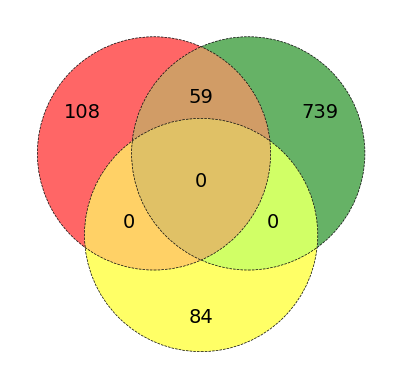

In [ ]:
v3 = venn3_unweighted([set(CHEMBl.SMILES), set(BSITE.SMILES), set(Molecules.SMILES)],
                      set_labels=(None, None, None),
                      alpha=0.6, set_colors=('red', 'green', 'yellow'),
                      )
venn3_circles(subsets = [1,1,1,1,1,1,1],
              linestyle = 'dashed',
              linewidth = 0.5)
for text in v3.set_labels:
    text.set_fontsize(17)
for text in v3.subset_labels:
    text.set_fontsize(14)

plt.savefig(fname = 'overlap_compounds.png', dpi = 600, bbox_inches = 'tight', transparent = True)


# Scaffold overlapping

In [ ]:
# mount databases
CHEMBl_sca = pd.read_csv('/content/CHEMBl_scaffolds.csv')
BSITE_sca = pd.read_csv('/content/BSITE_scaffolds.csv')
Molecules_sca = pd.read_csv('/content/Molecules_scaffolds.csv')

CHEMBl_sca = CHEMBl_sca[['ID', 'SCAFFOLD']]
BSITE_sca = BSITE_sca[['ID', 'SCAFFOLD']]
Molecules_sca = Molecules_sca[['ID', 'SCAFFOLD']]

print(CHEMBl_sca.shape)
print(BSITE_sca.shape)
print(Molecules_sca.shape)

(167, 2)
(819, 2)
(84, 2)


In [ ]:
CHEMBl_sca = CHEMBl_sca.drop_duplicates(subset = ['SCAFFOLD'], keep = 'first').reset_index(drop = True)
BSITE_sca = BSITE_sca.drop_duplicates(subset = ['SCAFFOLD'], keep = 'first').reset_index(drop = True)
Molecules_sca = Molecules_sca.drop_duplicates(subset = ['SCAFFOLD'], keep = 'first').reset_index(drop = True)

print(CHEMBl_sca.shape)
print(BSITE_sca.shape)
print(Molecules_sca.shape)

(74, 2)
(331, 2)
(68, 2)


In [ ]:
CHEMBl_BSITE_sca_overlap = CHEMBl_sca.merge(BSITE_sca, on = 'SCAFFOLD')
CHEMBl_BSITE_sca_overlap.to_csv('CHEMBl_BSITE_sca_overlap.csv', index = False)
CHEMBl_BSITE_sca_overlap

,ID_x,SCAFFOLD,ID_y
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCCC1,50130379
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCCC1,50130389
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCCC1,50130376
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCCC1,22059
4,CHEMBL372180,O=C(CNC12CCC(CC1)CC2)N1CCCC1,50130390
5,CHEMBL305170,C1CCNC1,1079748
6,CHEMBL427012,O=C(CNC1C2CC3CC(C2)CC1C3)N1CCCC1,50130370
7,CHEMBL196933,O=C(CNC1CCCCCC1)N1CCCC1,50130373
8,CHEMBL362922,O=C(CNC1CC2CCCC1C2)N1CCCC1,50130372
9,CHEMBL210995,O=C([C@@H]1CN[C@H](C(=O)N2CCCC2)C1)N1Cc2ccccc2C1,22043


In [ ]:
CHEMBl_BSITE_Molecules_sca_overlap = CHEMBl_BSITE_sca_overlap.merge(Molecules_sca, on = 'SCAFFOLD')
CHEMBl_BSITE_Molecules_sca_overlap.to_csv('CHEMBl_BSITE_Molecules_sca_overlap.csv', index = False)
CHEMBl_BSITE_Molecules_sca_overlap

,ID_x,SCAFFOLD,ID_y,ID
0,CHEMBL2332622,O=C(NCC(=O)N1CCCC1)c1ccnc2ccccc12,1225336,18F10


In [ ]:
CHEMBl_Molecules_sca_overlap = CHEMBl_sca.merge(Molecules_sca, on = 'SCAFFOLD')
CHEMBl_Molecules_sca_overlap.to_csv('CHEMBl_Molecules_sca_overlap.csv', index = False)
CHEMBl_Molecules_sca_overlap

,ID_x,SCAFFOLD,ID_y
0,CHEMBL2332622,O=C(NCC(=O)N1CCCC1)c1ccnc2ccccc12,18F10


/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


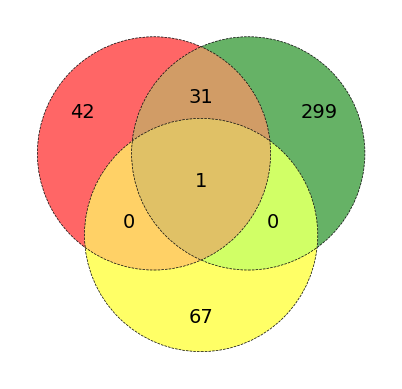

In [ ]:
v3_sca = venn3_unweighted([set(CHEMBl_sca.SCAFFOLD), set(BSITE_sca.SCAFFOLD), set(Molecules_sca.SCAFFOLD)],
                      set_labels=(None, None, None),
                      alpha=0.6, set_colors=('red', 'green', 'yellow'),
                      )
venn3_circles(subsets = [1,1,1,1,1,1,1],
              linestyle = 'dashed',
              linewidth = 0.5)

for text in v3_sca.set_labels:
    text.set_fontsize(17)
for text in v3_sca.subset_labels:
    text.set_fontsize(14)

plt.savefig(fname = 'overlap_scaffolds.png', dpi = 600, bbox_inches = 'tight', transparent = True)


<ipython-input-21-b9413467b9fc>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


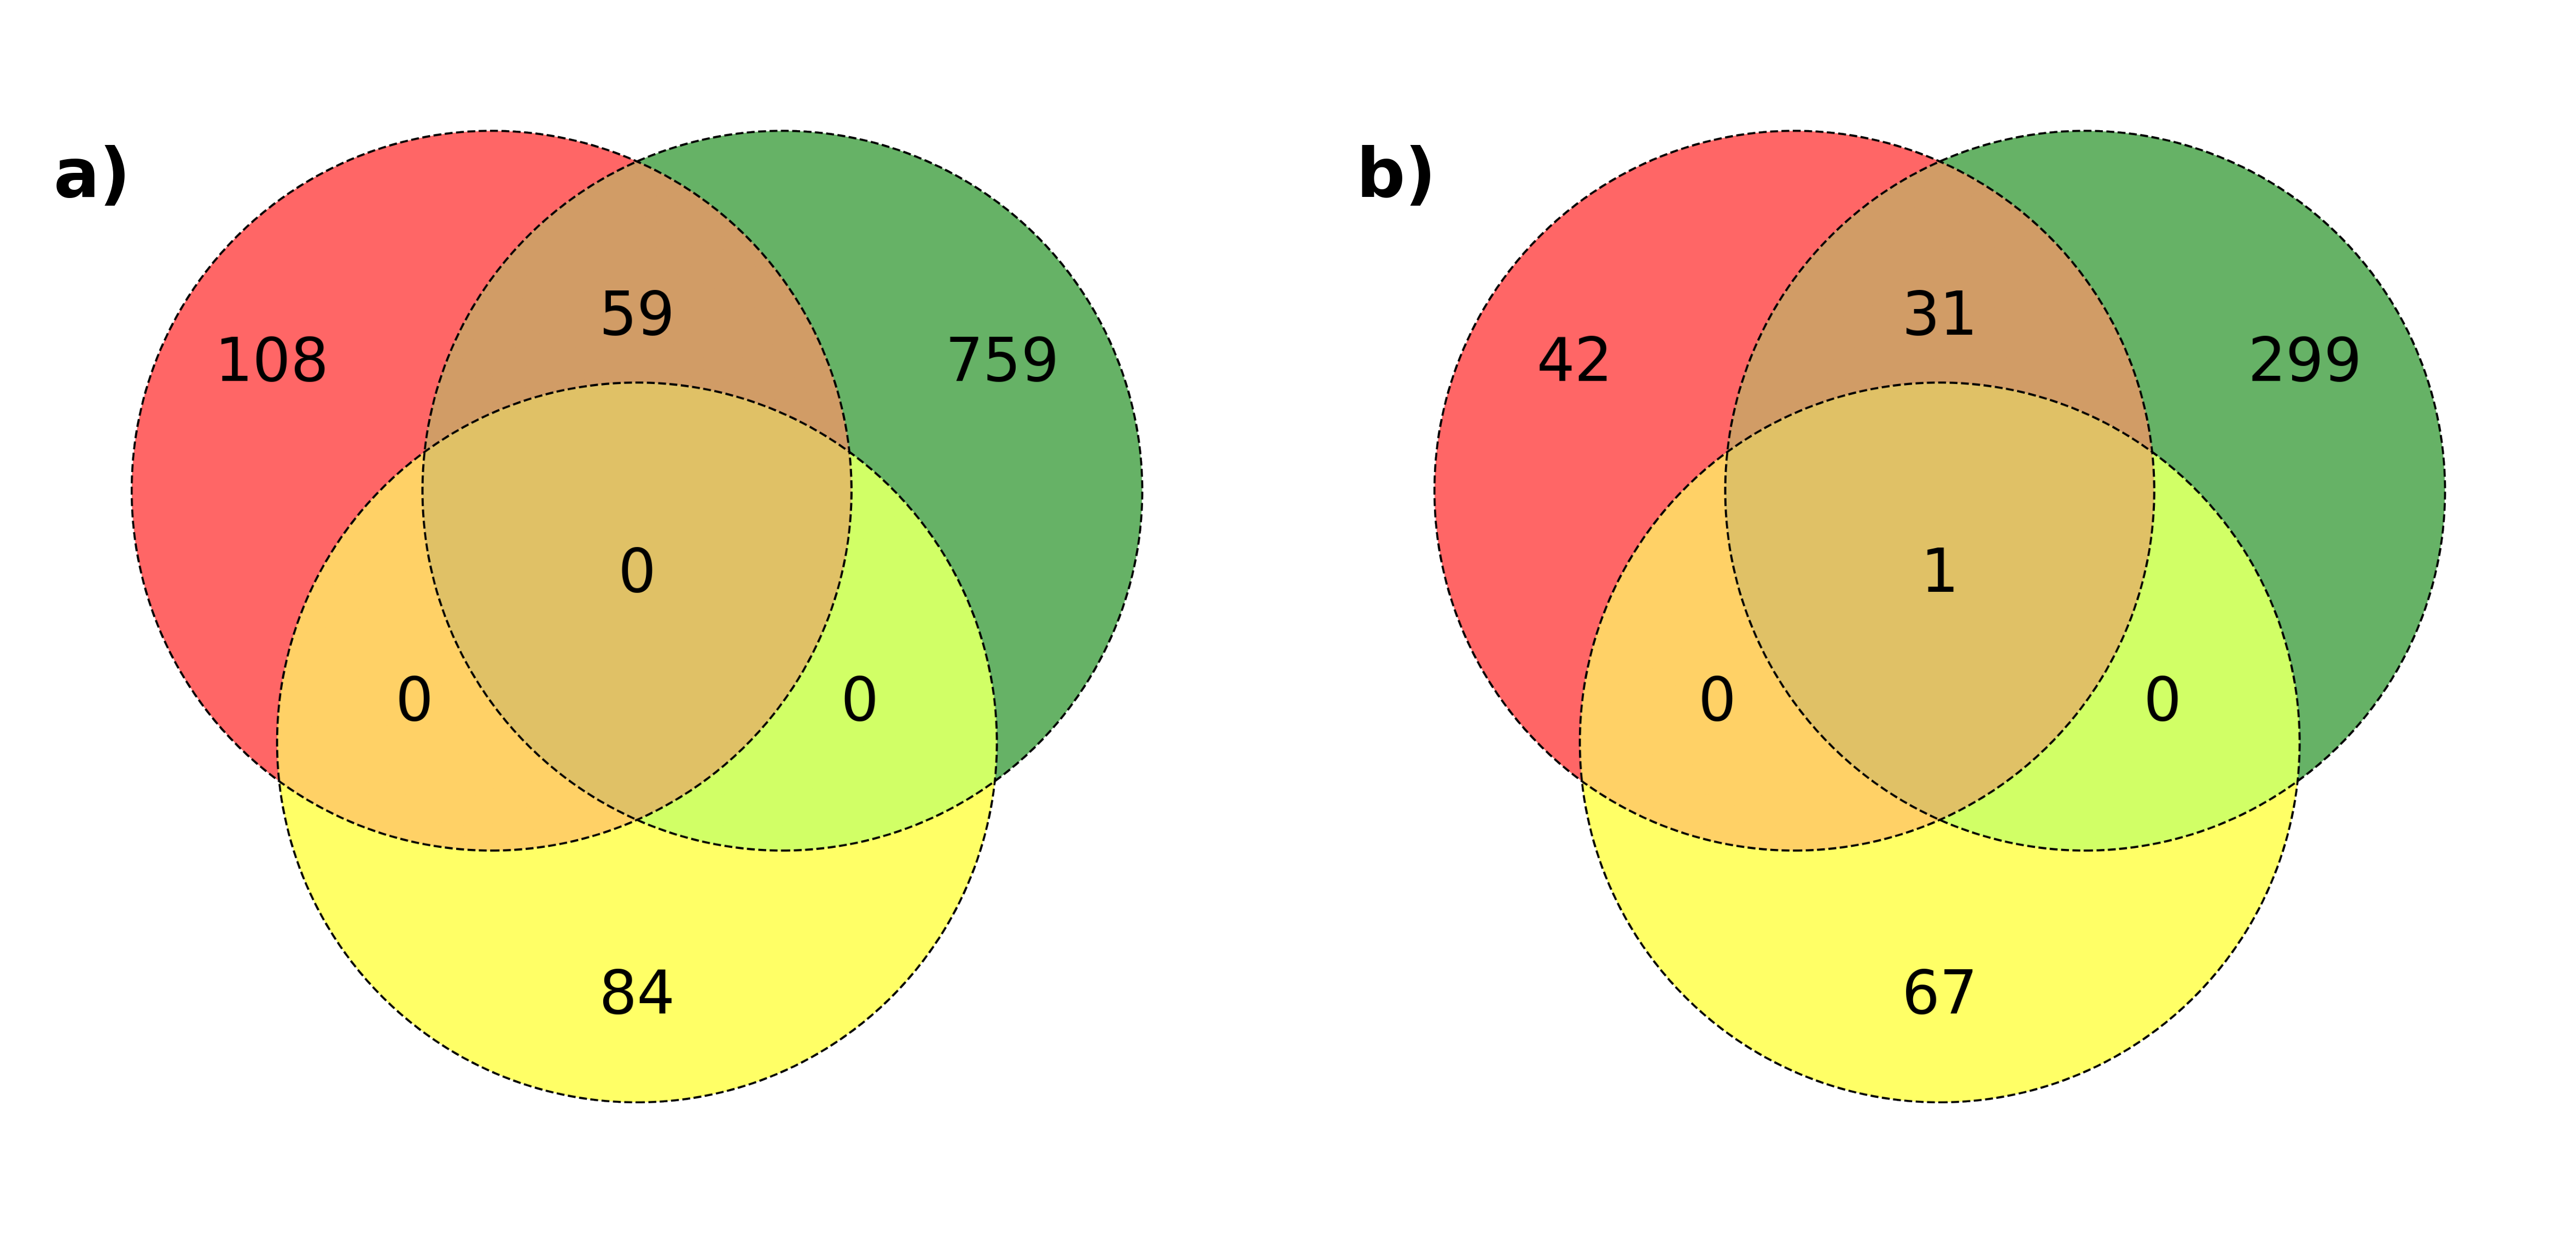

In [ ]:
# call the previously called figures
image_paths = ['overlap_compounds.png',
               'overlap_scaffolds.png']
# create labels with literals for each image in the grid:
labels = ['a)', 'b)']

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, dpi = 300, facecolor = 'w', edgecolor = 'k',
                        gridspec_kw = {'hspace': 0.05, 'wspace': 0.05}, figsize = (20, 10))

for i, ax in enumerate(axs.flat):
  if i < len(image_paths):
    img = plt.imread(image_paths[i])
    ax.imshow(img)
    ax.axis('off')
    # add the literal labels created
    ax.annotate(labels[i], xy = (0.03, 0.85), xycoords = 'axes fraction', fontsize = 30, weight = 'bold')
  else:
    ax.axis('off')
plt.tight_layout()

plt.savefig('overlap_visualization.png', bbox_inches = 'tight', pad_inches = 0, dpi = 600)